# Del 9: Priprava in čiščenje podatkov - napredno

Pripravimo datasete:

In [1]:
!tar -xJf data/data_del_09.tar.xz -C ./data/

## Working With Strings In Pandas

### Data

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# read the data sets into pandas
world_dev = pd.read_csv("data/World_dev.csv")
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [4]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
world_dev.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [6]:
merged = pd.merge(left=happiness2015,
                 right=world_dev,
                 how='left',
                 left_on='Country',
                 right_on='ShortName')

In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 43 columns):
Country                                       158 non-null object
Region_x                                      158 non-null object
Happiness Rank                                158 non-null int64
Happiness Score                               158 non-null float64
Standard Error                                158 non-null float64
Economy (GDP per Capita)                      158 non-null float64
Family                                        158 non-null float64
Health (Life Expectancy)                      158 non-null float64
Freedom                                       158 non-null float64
Trust (Government Corruption)                 158 non-null float64
Generosity                                    158 non-null float64
Dystopia Residual                             158 non-null float64
CountryCode                                   145 non-null object
ShortName                    

In [8]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

In [9]:
merged.rename(col_renaming, axis=1, inplace=True)

In [10]:
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


### Using Apply to Transform Strings

In [11]:
merged['CurrencyUnit'].head()

0        Swiss franc
1      Iceland krona
2       Danish krone
3    Norwegian krone
4    Canadian dollar
Name: CurrencyUnit, dtype: object

In [12]:
words = 'Danish krone'

In [13]:
words.split()[-1]

'krone'

In [14]:
def extract_last_word(element):
    return str(element).split()[-1]

In [15]:
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

In [16]:
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

### Vectorized String Methods

<img src="./images/Split.png">

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

<img src="./images/Syntax.png">

In [21]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized']

0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       NaN
156     franc
157     franc
Name: Currency Vectorized, Length: 158, dtype: object

#### Exploring Missing Values with Vectorized String Methods

In [23]:
merged['CurrencyUnit'].isnull().sum() # število manjkajočih vrednosti

13

In [24]:
def compute_lengths(element):
    return len(str(element))

In [25]:
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [26]:
lengths_apply.value_counts(dropna=False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
20     1
23     1
10     1
39     1
Name: CurrencyUnit, dtype: int64

In [28]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))

In [29]:
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [30]:
lengths_apply.value_counts(dropna=False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [32]:
merged['CurrencyUnit'].str.len().value_counts(dropna=False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

## Regular Expressions in Pandas

https://regexr.com/

### The Regular Expression Module

In [33]:
import re

In [34]:
pattern = 'and'
re.search(pattern, 'This is a hand.')

<re.Match object; span=(11, 14), match='and'>

In [35]:
pattern = 'and'
re.search(pattern, 'This is a leg.')

### Finding Specific Words in Strings

<img src="./images/set_syntax_breakdown.svg">

<img src="./images/basic_match_2.svg">

In [49]:
# stari način
pattern1 = 'National accounts'
pattern2 = 'national accounts'
national_accounts1 = merged['SpecialNotes'].str.contains(pattern1)
national_accounts2 = merged['SpecialNotes'].str.contains(pattern2)

In [60]:
data = pd.DataFrame({'data1': national_accounts1, 'data2': national_accounts2})
data[((data['data1'] == True) & (data['data2'] == True))]

,data1,data2
23,True,True
152,True,True


In [61]:
merged.loc[23,'SpecialNotes']

'Fiscal year end: March 31; reporting period for national accounts data: CY. Country reports using a blend of SNA 1993 and SNA 2008. April 2012 database update: National accounts time series were replaced with official government statistics.'

In [62]:
merged.loc[152,'SpecialNotes']

'Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.'

In [43]:
pattern = '[Nn]ational accounts'

In [37]:
merged['SpecialNotes'].head(10)

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Fiscal year end: March 31; reporting period fo...
5    A simple multiplier is used to convert the nat...
6    A simple multiplier is used to convert the nat...
7    Fiscal year end: June 30; reporting period for...
8    Fiscal year end: March 31; reporting period fo...
9    Fiscal year end: June 30; reporting period for...
Name: SpecialNotes, dtype: object

In [44]:
national_accounts = merged['SpecialNotes'].str.contains(pattern)

In [47]:
national_accounts.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4     True
5    False
6    False
7     True
8     True
9     True
Name: SpecialNotes, dtype: object

In [45]:
national_accounts.sum()

54

In [48]:
merged['SpecialNotes'].str.contains(pattern).sum()

54

In [63]:
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

### Using Regular Expressions to Select Data

In [64]:
merged[national_accounts]

ValueError: cannot index with vector containing NA / NaN values

In [65]:
pattern = '[Nn]ational accounts'
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)

In [66]:
national_accounts.value_counts(dropna=False)

False    104
True      54
Name: SpecialNotes, dtype: int64

In [67]:
merged_nataional = merged[national_accounts]

In [69]:
merged_nataional.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


### Import new dataset

In [70]:
hn = pd.read_csv('data/hacker_news.csv')

In [71]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


In [72]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
id              20099 non-null int64
title           20099 non-null object
url             17659 non-null object
num_points      20099 non-null int64
num_comments    20099 non-null int64
author          20099 non-null object
created_at      20099 non-null object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [74]:
titles = hn['title']

In [75]:
pattern = r'[Pp]ython'
titles.str.contains(pattern).sum()

160

In [80]:
pattern = r'[Rr]uby'
titles[titles.str.contains(pattern)].head()

190                    Ruby on Google AppEngine Goes Beta
484          Related: Pure Ruby Relational Algebra Engine
1388    Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2022    Show HN: CrashBreak  Reproduce exceptions as f...
Name: title, dtype: object

### Quantifiers


<p></p><center><img alt="quantifier example" src="images/quantifier_example.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_numeric.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_other.svg"></center><p></p>


    email, e-mail

In [83]:
pattern = r'e-?mail'
titles.str.contains(pattern).sum()

86

    1992-1998

In [84]:
pattern = r'19{2}[2-8]'
titles.str.contains(pattern).sum()

47

### Character Classes

    [pdf]

In [85]:
pattern = r'\[pdf\]'


<p></p><center><img alt="character classes one" src="images/character_classes_v2_1.svg"></center><p></p>

<p></p><center><img alt="character classes two" src="images/character_classes_v2_2.svg"></center><p></p>


In [87]:
pattern = r'\[\w+\]'

In [88]:
titles.str.contains(pattern).sum()

444

In [90]:
titles[titles.str.contains(pattern)].head()

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object

### Raw strings

In [97]:
print('hell\bhello')

hellhello


In [98]:
print(r'hell\bhello')

hell\bhello


### Extracting Substrings from a Series

In [107]:
titles = hn['title']
pattern = r'\[\w+\]'
tag_titles = titles[titles.str.contains(pattern)]
tag_5 = tag_titles.head()

In [108]:
tag_5

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object

In [110]:
pattern_ex = r'(\[\w+\])'
tag_5.str.extract(pattern_ex)

,0
66,[pdf]
100,[German]
159,[pdf]
162,[pdf]
195,[Beta]


In [114]:
pattern_ex = r'\[(\w+)\]'
tag_5.str.extract(pattern_ex)

,0
66,pdf
100,German
159,pdf
162,pdf
195,Beta


In [115]:
pattern_ex = r'\[(\w+)\]'
tag_5.str.extract(pattern_ex, expand=False)

66        pdf
100    German
159       pdf
162       pdf
195      Beta
Name: title, dtype: object

In [118]:
titles.str.extract(pattern_ex, expand=False).value_counts().head(10)

pdf       276
video     111
2015        3
audio       3
beta        2
2014        2
slides      2
blank       1
crash       1
png         1
Name: title, dtype: int64

### Replace

In [121]:
titles_test = titles.copy()
titles_test.str.replace(r'\(2\d{3}\)', '3000')

0                                Interactive Dynamic Video
1        Florida DJs May Face Felony for April Fools' W...
2             Technology ventures: From Idea to Enterprise
3          Note by Note: The Making of Steinway L1037 3000
4        Title II kills investment? Comcast and other I...
                               ...                        
20094    How Purism Avoids Intels Active Management Tec...
20095            YC Application Translated and Broken Down
20096    Microkernels are slow and Elvis didn't do no d...
20097                        How Product Hunt really works
20098    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20099, dtype: object

### Using Flags to Modify Regex Patterns

In [122]:
email_tests = pd.Series(['email', 'Email', 'eMail', 'EMAIL'])

In [123]:
# se da boljše
pattern = r'[Ee][Mm][Aa][Ii][Ll]'

In [124]:
import re
email_tests.str.contains(r'email', flags=re.I)

0    True
1    True
2    True
3    True
dtype: bool

### Primer: Create a frequency table of the different capitalizations of SQL

In [126]:
pattern = r'(SQL)'
titles.str.extract(pattern, flags=re.I, expand=False).value_counts()

SQL    101
Sql      4
sql      3
Name: title, dtype: int64

In [130]:
pattern = r'(\w+SQL)'
hn_sql = hn[hn['title'].str.contains(pattern, flags=re.I)].copy()

In [131]:
hn_sql.head()

,id,title,url,num_points,num_comments,author,created_at
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55
1160,10546681,How to choose an in-memory NoSQL solution: Per...,http://articles.rvncerr.org/how-to-chose-an-in...,9,4,rvncerr,11/11/2015 14:04
1197,11583183,Postgraphql: A GraphQL schema created by refle...,https://github.com/calebmer/postgraphql,217,24,craigkerstiens,4/27/2016 18:29


In [132]:
hn_sql['flavor'] = hn_sql['title'].str.extract(pattern, flags=re.I, expand=False)

In [133]:
hn_sql.head()

,id,title,url,num_points,num_comments,author,created_at,flavor
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21,PostgreSQL
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32,MemSQL
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55,PostgreSQL
1160,10546681,How to choose an in-memory NoSQL solution: Per...,http://articles.rvncerr.org/how-to-chose-an-in...,9,4,rvncerr,11/11/2015 14:04,NoSQL
1197,11583183,Postgraphql: A GraphQL schema created by refle...,https://github.com/calebmer/postgraphql,217,24,craigkerstiens,4/27/2016 18:29,PostgreSQL


In [135]:
hn_sql['flavor'].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
CloudSQL       1
SparkSQL       1
MemSQL         1
nosql          1
mySql          1
Name: flavor, dtype: int64

In [136]:
hn_sql['flavor'] = hn_sql['flavor'].str.lower()

In [137]:
hn_sql['flavor'].value_counts()

postgresql    27
nosql         17
mysql         13
memsql         1
sparksql       1
cloudsql       1
Name: flavor, dtype: int64

In [138]:
hn_sql.pivot_table(index='flavor', values='num_comments', aggfunc='mean')

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


In [140]:
# isto z pomočjo groupby-ja
hn_sql.groupby('flavor')['num_comments'].mean()

flavor
cloudsql       5.000000
memsql        14.000000
mysql         12.230769
nosql         14.529412
postgresql    25.962963
sparksql       1.000000
Name: num_comments, dtype: float64

### Primer: Versions of Python

In [141]:
pattern = r'[Pp]ython\s([\d\.]+)'
titles.str.extract(pattern, expand=False).value_counts()

3        10
2         3
3.5       3
3.6       2
2.7       1
1.5       1
8         1
3.5.0     1
4         1
Name: title, dtype: int64

### Primer: Extracting URL Parts

In [147]:
url_parts = hn['url']
pd.set_option('display.max_colwidth', -1)

In [149]:
url_parts.head(20)

0     http://www.interactivedynamicvideo.com/                                                                          
1     http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/                           
2     https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429                                 
3     http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0                                                       
4     http://arstechnica.com/business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/  
5     NaN                                                                                                              
6     NaN                                                                                                              
7     http://firstround.com/review/shims-jigs-and-other-woodworking-concepts-to-conquer-technical-debt/                
8     http://www.southpolestation.com/tr

In [153]:
pattern = r'(.+)://([\w\.]+)/?(.*)'
url_parts.str.extract(pattern).head()

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-water-joke/63798/
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/


#### Using Named Capture Groups

In [152]:
pattern = r'(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)'
url_parts.str.extract(pattern).head()

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-water-joke/63798/
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/


### Primer: Clean a String Column, Aggregate the Data, and Plot the Results

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

In [154]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone,krone
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone,krone
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar


In [155]:
merged['IncomeGroup'].head()

0    High income: OECD
1    High income: OECD
2    High income: OECD
3    High income: OECD
4    High income: OECD
Name: IncomeGroup, dtype: object

In [156]:
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')

In [158]:
pv_incomes

,Happiness Score
IncomeGroup,
High income: OECD,6.674000
High income: nonOECD,6.250765
Low income,3.925625
Lower middle income,4.927971
Upper middle income,5.426718


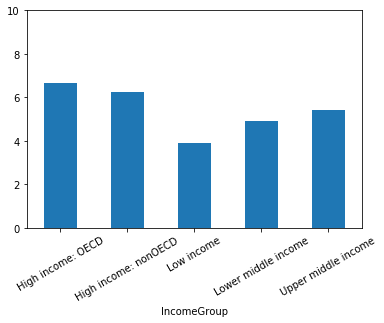

In [160]:
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10), legend=False)
plt.show()

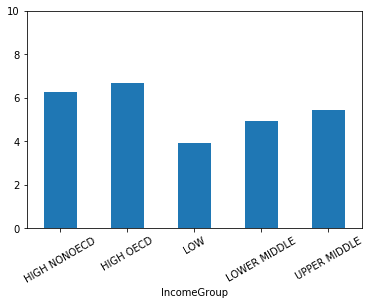

In [161]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10), legend=False)
plt.show()

## Working With Missing Data

### Introduction

In [162]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [163]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [164]:
shape_2015

(164, 13)

In [165]:
shape_2016

(164, 14)

In [166]:
shape_2017

(164, 13)

### Identifying Missing Values

In [167]:
missing = happiness2015['Happiness Score'].isnull()

In [168]:
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [169]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [170]:
happiness2016.isnull().sum()

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [171]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

### Correcting Data Cleaning Errors that Result in Missing Values

In [172]:
combined = pd.concat([happiness2015,happiness2016,happiness2017], ignore_index=True, sort=True)

In [173]:
combined.isnull().sum()

Country                          0  
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                           22 
Freedom                          22 
Generosity                       22 
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                             0  
dtype: int64

In [174]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [175]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ') \
                        .str.replace(r'\s+', ' ') \
                        .str.strip() \
                        .str.upper()

In [176]:
happiness2017.head(2)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [177]:
happiness2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [178]:
happiness2016.columns = happiness2016.columns.str.replace('.', ' ') \
                        .str.replace(r'[\(\)]', '') \
                        .str.strip() \
                        .str.upper()

In [179]:
happiness2016.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [180]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [181]:
happiness2015.columns = happiness2015.columns.str.replace('.', ' ') \
                        .str.replace(r'[\(\)]', '') \
                        .str.strip() \
                        .str.upper()

In [182]:
happiness2015.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [183]:
combined = pd.concat([happiness2015,happiness2016,happiness2017], ignore_index=True, sort=True)

In [184]:
combined.isnull().sum()

COUNTRY                        0  
DYSTOPIA RESIDUAL              22 
ECONOMY GDP PER CAPITA         22 
FAMILY                         22 
FREEDOM                        22 
GENEROSITY                     22 
HAPPINESS RANK                 22 
HAPPINESS SCORE                22 
HEALTH LIFE EXPECTANCY         22 
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION    22 
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                           0  
dtype: int64

### Visualizing Missing Data

In [185]:
import seaborn as sns

In [186]:
combined_updated = combined.set_index('YEAR')

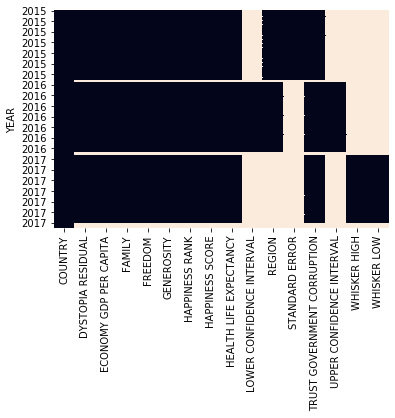

In [187]:
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [189]:
combined[combined['YEAR'] == 2017]['REGION'].isnull().sum()

164

### Using Data From Additional Sources to Fill in Missing Values

In [ ]:
regions2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions2016 = happiness2016[['COUNTRY', 'REGION']].copy()


### Identifying Duplicates Values

### Correcting Duplicates Values

### Handle Missing Values by Dropping Columns

In [ ]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

### Analyzing Missing Data

### Handling Missing Values with Imputation

### Dropping Rows

## Identifying Hidden Missing Data

### Primer: Happiness 2015

In [ ]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv')

### Primer: Diabetes

In [ ]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

#### Analyzing missingness percentage

## Andvance Visualization of Missing Data

In [ ]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Missingness Patterns

## Handle Missing Values

### Dropping Rows

### Imputation Techniques

#### Mean & median imputation


#### Mode and constant imputation

#### Visualize imputations

In [ ]:



imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

